In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy


# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
plt.rcParams['axes.grid'] = True
sns.set()

#### Генерируем данные

In [10]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

In [11]:
# n = 6020
# t = 6000
# arparams = np.array([0.4])
# maparams = np.array([0])
# arparams = np.r_[1, -arparams]
# maparams = np.r_[1, maparams]
# # np.random.seed(2014)

# arparams = np.r_[1, -ar_params]
# maparams = np.r_[1, ma_params]
# y = arma_generate_sample(arparams, maparams, n)

# model = ARIMA(y[:t], order=(1,0,1), trend='n').fit()
# ar, ma = model.arparams, model.maparams
# ar, ma
# forecast = copy.copy(y)

In [12]:
np.random.seed(7)
def generate_arma(ar_params, ma_params, sigma, n):
    p = len(ar_params)
    q = len(ma_params)
    
    epsilon = np.random.normal(0, sigma, n + max(p, q))
    series = np.zeros(n)
    
    for i in range(max(p, q), n):
        ar_term = sum([ar_params[j] * series[i-j-1] for j in range(p)])
        ma_term = sum([ma_params[j] * epsilon[i-j-1] for j in range(q)])
        series[i] = ar_term + ma_term + epsilon[i]
        
    return series, epsilon

def forecast_next(ar_params, ma_params, true_values, predicted_values):
    ar_component = 0
    for i in range(1, len(ar_params) + 1):
        if len(predicted_values) - i >= 0:
            ar_component += ar_params[i - 1] * predicted_values[-i]

    ma_component = 0
    for i in range(1, len(ma_params) + 1):
        if len(predicted_values) - i >= 0:
            ma_component += ma_params[i - 1] * (true_values[-i] - predicted_values[-i])

    forecasted_value = ar_component + ma_component
    return forecasted_value

def get_predicted(arma_series, ar_params, ma_params, m, n):
    true_values = list(arma_series[:m])
    predicted_values = list(arma_series[:m])
    for i in range(m, n):
        forecast = forecast_next(ar_params, ma_params, true_values, predicted_values)
        predicted_values.append(forecast)
        true_values.append(arma_series[i])
    
    predicted_values = np.array(predicted_values)
    return predicted_values

In [13]:
np.random.seed(7)
n = 3000
m = 2200

ar_params = np.array([0.5])
ma_params =  np.array([-0.2])

bad_ar_params = [0.4]
bad_ma_params = [-0.5]
# ar_roots = np.roots(np.r_[1, -np.array(ar_params)])
# print(np.all(np.abs(ar_roots) > 1))
arma_series, err = generate_arma(ar_params, ma_params, 1, n)

arparams = np.r_[1, -ar_params]
maparams = np.r_[1, ma_params]
y = arma_generate_sample(arparams, maparams, n)


predicted_values = get_predicted(y, ar_params, ma_params, m, n)
badly_predicted_values = get_predicted(y, bad_ar_params, bad_ma_params, m, n)

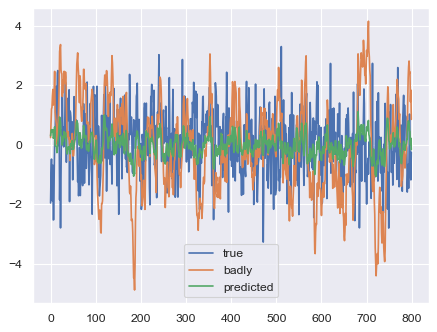

In [14]:
plt.plot(arma_series[m-n:], label='true')
plt.plot(badly_predicted_values[m-n:], label='badly')
plt.plot(predicted_values[m-n:], label='predicted')
plt.legend()

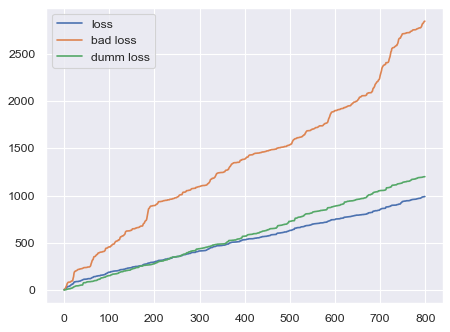

In [15]:
loss_f = lambda x, y: np.square(x - y)
losses = loss_f(arma_series, predicted_values)
bad_losses = loss_f(arma_series, badly_predicted_values)

dumm_values = np.roll(arma_series, 1)
dumm_losses = loss_f(arma_series, dumm_values)

plt.plot(losses[m-n:].cumsum(), label='loss')
plt.plot(bad_losses[m-n:].cumsum(), label='bad loss')
plt.plot(dumm_losses[m-n:].cumsum(), label='dumm loss')

plt.legend()
plt.show()

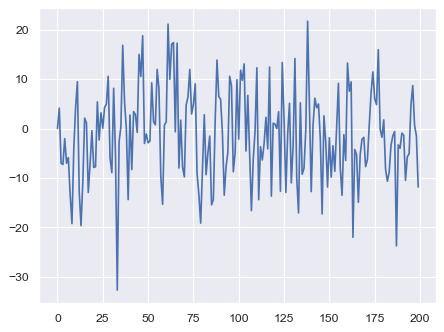

In [16]:
np.random.seed(32)
n = 200
ar_params = np.array([0.3])
ma_params =  np.array([-9])
y, err = generate_arma(ar_params, ma_params, 1, n)
# y = arma_generate_sample(arparams, maparams, n)
plt.plot(y)

In [17]:
forecasted = np.zeros(y.size)
for i in range(50, y.size):
    model = ARIMA(y[:i], order=(1, 0, 1)).fit()
    forecasted[i] = model.forecast()[0]

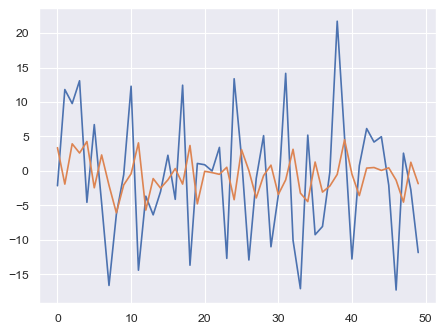

In [18]:
plt.plot(y[100:150])
plt.plot(forecasted[100:150])
# plt.plot(y)
# plt.plot(forecasted)